In [3]:
import tensorflow
import pandas as pd
import mitosheet as mt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
from matplotlib import pyplot as plt
from matplotlib import style
import mitosheet
from sklearn import svm
from sklearn import metrics

In [4]:
df = pd.read_csv("student-mat.csv", sep = ";")
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
columns_list = ["Medu","Fedu","freetime","goout","absences","G1","G2","G3"]
new_df = df[columns_list]


In [6]:
X = np.array(new_df.drop(["G3"],1))
X
y = np.array(new_df["G3"])
print(y, len(y))

[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 15 13 18 14 11  0  8 14 16 11 10 14 18 13 12 18  8 12 10  0 13
 11 11 13 11  0  9 10 11 13  9 11 15 15 11 16 10  9

In [90]:
maxs = 0
final_linear = None
for _ in range(30):
    x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.1)
    linear = LinearRegression().fit(x_train,y_train)
    acc = linear.score(x_test,y_test)
    if maxs <= acc:
        # option 2: save the model here
        # with open("student_model.pickle","wb")as f:
        # pickle.dump(linear,f)
        
        final_linear = None
        maxs = acc
        final_linear = linear
        final_linear.score(x_test,y_test)
print(maxs)

0.9596977621407995


In [91]:
predictions = final_linear.predict(x_test)

In [92]:
for i in range(len(predictions[:5])):
    print(int(predictions[i]),y_test[i])

9 10
13 12
9 9
9 11
9 10


In [93]:
with open("student_model.pickle","wb")as f:
    pickle.dump(final_linear,f)

In [94]:
load_model = open("student_model.pickle","rb")
student_trained_model = pickle.load(load_model)

In [95]:
num  = 10
predict = student_trained_model.predict(x_test[:num])
print([int(i) for i in predict], y_test[:num])

[9, 13, 9, 9, 9, 5, 14, 12, 12, 7] [10 12  9 11 10  9 14 13 13  6]


In [97]:
print(student_trained_model.coef_)

[ 0.10993648 -0.07345298  0.09390982  0.0251319   0.03514891  0.1669398
  0.98656381]


In [99]:
print(student_trained_model.intercept_)

-2.712867012658103


Text(0, 0.5, 'G3')

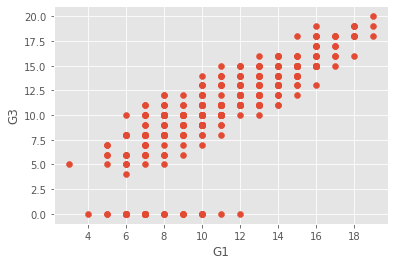

In [5]:
p = 'G1'
style.use("ggplot")
plt.scatter(new_df[p],new_df["G3"])
plt.xlabel(p)
plt.ylabel('G3')


In [122]:
new_df

,Medu,Fedu,freetime,goout,absences,G1,G2,G3
0,4,4,3,4,6,5,6,6
1,1,1,3,3,4,5,5,6
2,1,1,3,2,10,7,8,10
3,4,2,2,2,2,15,14,15
4,3,3,3,2,4,6,10,10
...,...,...,...,...,...,...,...,...
390,2,2,5,4,11,9,9,9
391,3,1,4,5,3,14,16,16
392,1,1,5,3,3,10,8,7
393,3,2,4,1,0,11,12,10


In [6]:
# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the scatter traces to the figure
for column_header in ['G1']:
    fig.add_trace(go.Scatter(
        x=new_df[column_header],
        y=new_df['G3'],
        mode='markers',
        name=str(column_header)
    ))

# Update the layout
# See Plotly documentation for cutomizations: https://plotly.com/python/reference/scatter/
fig.update_layout(
    xaxis_title="G1",
    yaxis_title="Final Result",
    title="G1, G3 scatter plot",
)
fig.show(renderer="iframe")

In [18]:
for _ in range(20):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.15)
    cls = svm.SVC(kernel = "linear", C=4)
    cls.fit(x_train,y_train)
    y_predict = cls.predict(x_test)
    b = cls.score(x_test,y_test)
    # using metrics to calculate the result score
    c = metrics.accuracy_score(y_test,y_predict)
    print(c)

0.4166666666666667
0.5
0.4
0.5333333333333333
0.48333333333333334
0.38333333333333336
0.48333333333333334
0.5166666666666667
0.4666666666666667
0.36666666666666664
0.48333333333333334
0.48333333333333334
0.65
0.36666666666666664
0.5
0.3333333333333333
0.4
0.45
0.3333333333333333
0.48333333333333334


395